In [ ]:
todo: change train_data to sub_train

(540, 2500) (540,)


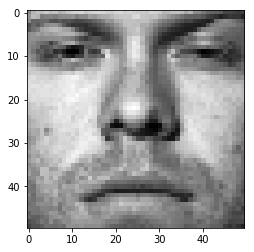

In [7]:
import numpy as np
from scipy import misc
from matplotlib import pylab as plt
import matplotlib.cm as cm
import imageio
%matplotlib inline

train_labels, train_data = [], []
for line in open('./faces/train.txt'):
    im = imageio.imread(line.strip().split()[0])
    train_data.append(im.reshape(2500,))
    train_labels.append(line.strip().split()[1])
    
train_data, train_labels = np.array(train_data, dtype=float), np.array(train_labels, dtype=int)
print(train_data.shape, train_labels.shape)

plt.imshow(train_data[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

[59.25185185 56.10185185 52.42222222 ... 67.22222222 64.61851852
 59.27592593]


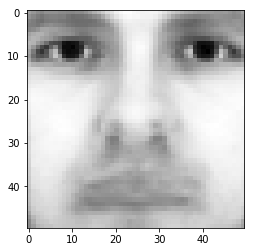

In [66]:
# average face
sum_face = train_data.sum(axis = 0)
avg_face = np.asarray([p/len(train_data) for p in sum_face])

# print(sum_face)
print(avg_face)
    
plt.imshow(avg_face.reshape(50,50), cmap = cm.Greys_r)
plt.show()

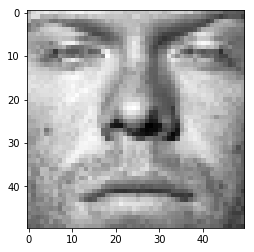

In [67]:
# mean substraction on train data
# sub_train_list = []
# for face in train_data:
#     sub_train_list.append(face - avg_face)
# sub_train = np.asarray(sub_train_list).reshape(-1, 2500)
# print(train_data[10])
# print(sub_train[10])

# sub_train = np.subtract(train_data, avg_face)
sub_train = train_data - avg_face.T
plt.imshow(sub_train[10].reshape(50,50), cmap = cm.Greys_r)
plt.show()

(100, 2500) (100,)


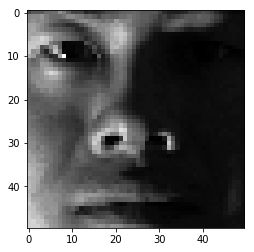

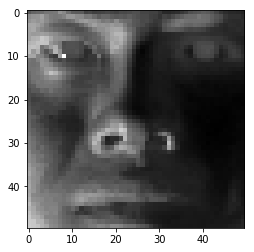

In [72]:
# load test data
test_labels, test_data = [], []
for line in open('./faces/test.txt'):
    im = imageio.imread(line.strip().split()[0])
    test_data.append(im.reshape(2500,))
    test_labels.append(line.strip().split()[1])
    
test_data, test_labels = np.array(test_data, dtype=float), np.array(test_labels, dtype=int)
print(test_data.shape, test_labels.shape)

plt.imshow(test_data[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

# mean subtraction on test data
# sub_test_list = []
# for face in test_data:
#     sub_test_list.append(face - avg_face)
# sub_test = np.asarray(sub_test_list).reshape(-1, 2500)
# print(test_data[10])
# print(sub_test[10])

# sub_test = np.subtract(test_data, avg_face)
sub_test = test_data - avg_face.T
plt.imshow(sub_test[10].reshape(50,50), cmap = cm.Greys_r)
plt.show()

(540, 540) (540,) (2500, 2500)


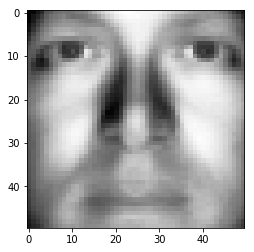

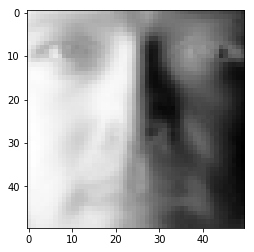

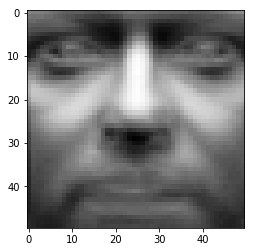

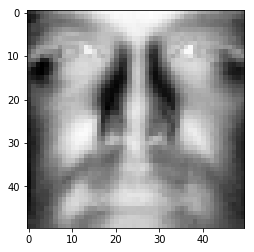

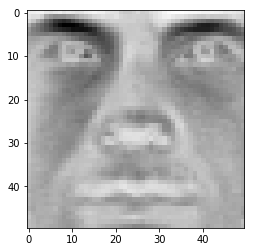

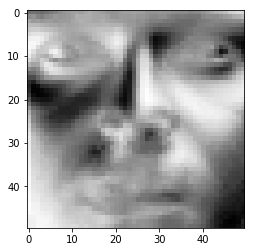

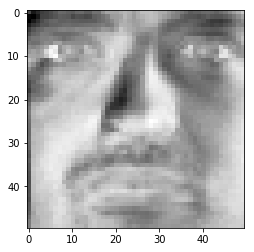

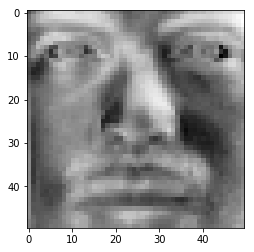

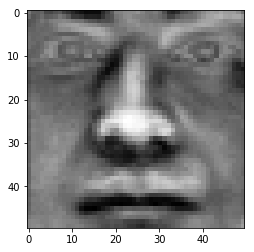

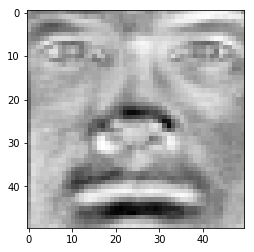

In [69]:
# eigenface

u, s, vh = np.linalg.svd(sub_train, full_matrices=True)
print(u.shape, s.shape, vh.shape)

for i in range(10):
    plt.imshow(vh[i].reshape(50,50), cmap = cm.Greys_r)
    plt.show()

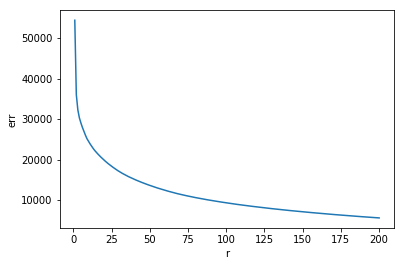

In [71]:
# low-rank approximation

err = [0]*200
# print(u.shape)
# print(np.diag(s).shape)
# print(vh.shape)
for r in range(1, 201):
    xr = np.linalg.multi_dot([u[:, :r], np.diag(s)[:r, :r], vh[:r, :]])
    err[r-1] = np.linalg.norm(sub_train - xr)

plt.plot([r for r in range(1, 201)], err)
plt.xlabel("r")
plt.ylabel("err")
plt.show()  

In [73]:
# eigen feature
r = 10
f_train = np.dot(sub_train, vh[:r, :].T)
print(f_train.shape)

f_test = np.dot(sub_test, vh[:r, :].T)
print(f_test.shape)

(540, 10)
(100, 10)


In [74]:
# face recognition
from sklearn.linear_model import LogisticRegression as lr

clf = lr().fit(f_train, train_labels)
# pred = clf.predict(f_test)
# print(pred)
pred_score = clf.score(f_test, test_labels)
print(pred_score)

0.79


1 0.17
2 0.11
3 0.13
4 0.14
5 0.42
6 0.32
7 0.49
8 0.62
9 0.73
10 0.8
11 0.83
12 0.85
13 0.85
14 0.85
15 0.87
16 0.87
17 0.88
18 0.85
19 0.87
20 0.84
21 0.86
22 0.87
23 0.86
24 0.88
25 0.9
26 0.88
27 0.88
28 0.89
29 0.88
30 0.91
31 0.92
32 0.88
33 0.89
34 0.89
35 0.91
36 0.91
37 0.91
38 0.91
39 0.91
40 0.91
41 0.92
42 0.93
43 0.93
44 0.93
45 0.94
46 0.93
47 0.94
48 0.92
49 0.91
50 0.92
51 0.93
52 0.93
53 0.92
54 0.92
55 0.92
56 0.92
57 0.93
58 0.92
59 0.91
60 0.92
61 0.92
62 0.94
63 0.93
64 0.95
65 0.94
66 0.93
67 0.93
68 0.92
69 0.93
70 0.93
71 0.94
72 0.93
73 0.94
74 0.94
75 0.94
76 0.94
77 0.94
78 0.94
79 0.94
80 0.94
81 0.94
82 0.93
83 0.93
84 0.94
85 0.93
86 0.94
87 0.94
88 0.92
89 0.93
90 0.93
91 0.93
92 0.93
93 0.94
94 0.93
95 0.92
96 0.93
97 0.92
98 0.92
99 0.92
100 0.92
101 0.92
102 0.92
103 0.92
104 0.92
105 0.92
106 0.92
107 0.92
108 0.93
109 0.92
110 0.92
111 0.92
112 0.93
113 0.92
114 0.92
115 0.93
116 0.93
117 0.92
118 0.92
119 0.93
120 0.93
121 0.93
122 0.92
123 0.93
124

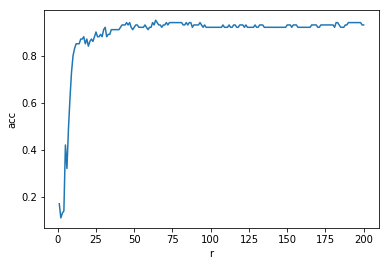

In [75]:
pred_scores = []
for r in range(1, 201):
    f_train = np.dot(train_data, vh[:r, :].T)
    f_test = np.dot(test_data, vh[:r, :].T)
    
    clf = lr().fit(f_train, train_labels)
    pred_score = clf.score(f_test, test_labels)
    print(r, pred_score)
    
    pred_scores.append(pred_score)

print(len(pred_scores))
plt.plot([r for r in range(1, 201)], pred_scores)
plt.xlabel("r")
plt.ylabel("acc")
plt.show()